In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import networkx as nx


In [2]:
df = pd.read_csv('TWoK_chapter_summaries.csv',
                 encoding='ISO-8859-1', 
                 quotechar='"',
                 delimiter=',',
                 skip_blank_lines=True,
                 engine='python',
                 )
df.head()

,Chapter,POV,Summary
0,1,Cenn,"Cenn, a new recruit in Brightlord Meridas Amar..."
1,2,Kaladin,"Kaladin is now a slave in a caravan, waiting t..."
2,3,Shallan,"Shallan Davar has just arrived in Kharbranth, ..."
3,4,Kaladin,"Kaladin is sitting in the slave wagon, waiting..."
4,5,Shallan,As Shallan meets Jasnah Kholin for the first t...


In [3]:
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower().replace('\n', ' ')
    text = text.replace('’', "'").replace(
        '“', '"').replace('”', '"').replace('—', '-')
    text = re.sub(r"[^a-z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text


df['Clean_Summary'] = df['Summary'].apply(clean_text)

In [4]:
characters = ['kaladin', 'shallan', 'dalinar', 'adolin', 'navani', 'jasnah',
              'syl', 'renarin', 'szeth', 'moash', 'rock', 'teft', 'lift', 'cenn']

mention_count = {char: df['Clean_Summary'].str.count(
    r'\b' + char + r'\b').sum() for char in characters}

In [5]:
mention_df = pd.DataFrame.from_dict(mention_count, orient='index', columns = ['Mentions'])
mention_df = mention_df.sort_values(by='Mentions', ascending=False)
mention_df

,Mentions
kaladin,26
shallan,18
jasnah,13
cenn,6
adolin,0
dalinar,0
navani,0
syl,0
szeth,0
renarin,0


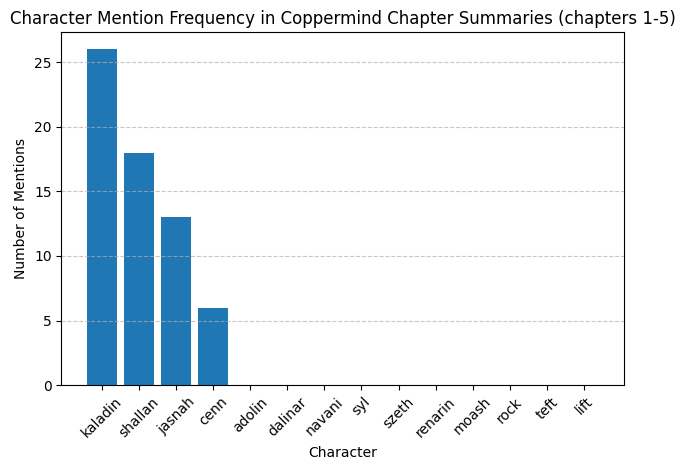

In [6]:
#character frequency plot
plt.Figure(figsize=(10, 6))
plt.bar(mention_df.index, mention_df['Mentions'])
plt.title(
    'Character Mention Frequency in Coppermind Chapter Summaries (chapters 1-5)')
plt.xlabel('Character')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [8]:
#co mention matrix
co_mentions = pd.DataFrame(0, index=characters, columns=characters)

# Fill the matrix
for summary in df['Clean_Summary']:
    mentioned = [char for char in characters if re.search(
        r'\b' + char + r'\b', summary)]
    for i in range(len(mentioned)):
        for j in range(i + 1, len(mentioned)):
            co_mentions.loc[mentioned[i], mentioned[j]] += 1
            co_mentions.loc[mentioned[j], mentioned[i]] += 1

print(co_mentions)

         kaladin  shallan  dalinar  adolin  navani  jasnah  syl  renarin  \
kaladin        0        0        0       0       0       0    0        0   
shallan        0        0        0       0       0       2    0        0   
dalinar        0        0        0       0       0       0    0        0   
adolin         0        0        0       0       0       0    0        0   
navani         0        0        0       0       0       0    0        0   
jasnah         0        2        0       0       0       0    0        0   
syl            0        0        0       0       0       0    0        0   
renarin        0        0        0       0       0       0    0        0   
szeth          0        0        0       0       0       0    0        0   
moash          0        0        0       0       0       0    0        0   
rock           0        0        0       0       0       0    0        0   
teft           0        0        0       0       0       0    0        0   
lift        

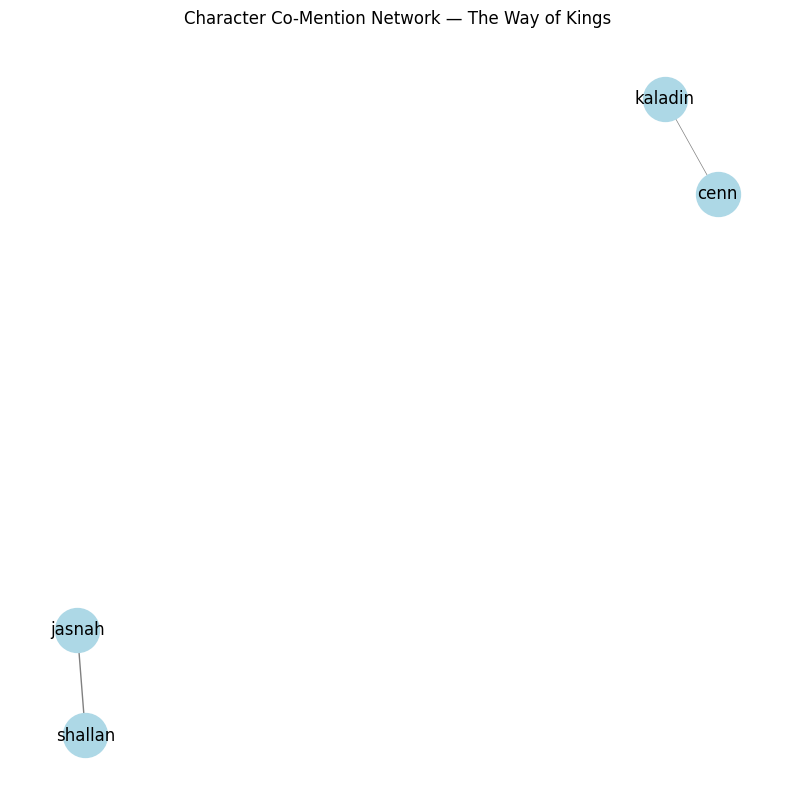

In [ ]:
# Create the graph
G = nx.Graph()

# Add edges (only if co-mention count > 0)
for char1 in co_mentions.index:
    for char2 in co_mentions.columns:
        weight = co_mentions.loc[char1, char2]
        if char1 != char2 and weight > 0:
            G.add_edge(char1, char2, weight=weight)

# Set positions for nodes
pos = nx.spring_layout(G, seed=42)  # "spring" layout spaces them naturally

# Draw the graph
plt.figure(figsize=(10, 10))
edges = G.edges(data=True)
weights = [edata['weight'] for _, _, edata in edges]

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue')

# Draw edges with thickness based on weight
nx.draw_networkx_edges(
    G, pos, width=[w * 0.5 for w in weights], edge_color='gray')

# Add labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

plt.title("Character Co-Mention Network — Coppermind chapter summary 1-5")
plt.axis('off')
plt.show()